In [79]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import itertools
import time
from sklearn.metrics import roc_auc_score
from collections import Counter
import regex as re
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os
import path

In [2]:
important_features_df = pd.read_csv('vol_pyrads_3d_fractals.csv')
important_features_df.drop(columns=['Unnamed: 0'],inplace=True)
important_features_df.head()

,patient_id,ed_val_original_shape_LeastAxisLength,ed_val_original_shape_Maximum3DDiameter,max_original_shape_Maximum2DDiameterColumn,min_original_shape_Maximum2DDiameterSlice,max_original_shape_Sphericity,median_original_shape_Sphericity,max_original_shape_Maximum2DDiameterRow,ed_val_original_shape_MinorAxisLength,median_original_shape_MajorAxisLength,...,lvmc_vol_ed,lvmc_vol_max,lv_std,lv_es_inc,lv_min_slope,lvmc_min_slope,lv_es_slope,pkvo2,dyspnea,petco2
0,101B,47.814915,93.682392,90.341366,48.961879,0.732554,0.646279,93.324116,49.740365,76.339074,...,123462.0000,136187.2500,9517.657049,6.252907,1.930682,2.030273,2.006020,1.52,1.0,25.0
1,103,53.529400,109.454400,98.924529,53.582442,0.773154,0.751866,104.254796,61.196740,90.643515,...,144242.0625,175513.6875,10586.318292,7.521387,2.816428,2.843704,2.816428,2.36,1.0,39.0
2,105B,57.459717,109.117268,107.108590,57.835029,0.760922,0.745915,108.182788,59.891196,96.370229,...,153582.9375,176055.1875,10607.786669,7.619092,2.343175,2.325445,2.587199,2.53,1.0,30.0
3,109,47.679752,102.946360,100.842777,42.085107,0.745966,0.728897,101.595091,54.112955,84.183141,...,126507.9375,135239.6250,15817.902632,6.216915,2.048207,2.335396,2.048207,1.23,1.0,27.0
4,113B,42.053038,101.761517,100.842777,36.252802,0.698498,0.642737,100.141150,47.723800,83.720063,...,113444.2500,120348.3750,10778.535362,5.862974,1.859355,2.348224,1.859355,1.32,1.0,26.0


In [96]:
important_features_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ed_val_original_shape_LeastAxisLength,51.0,47.478998,4.291084,37.002716,45.384572,47.679752,50.163104,58.273789
ed_val_original_shape_Maximum3DDiameter,51.0,101.604815,10.485610,83.397579,93.817670,101.452107,107.282620,130.267486
max_original_shape_Maximum2DDiameterColumn,51.0,98.388465,9.994347,82.547808,91.242209,97.690919,104.144806,127.655304
min_original_shape_Maximum2DDiameterSlice,51.0,45.880543,5.865482,34.580522,42.085107,45.096467,49.276668,58.658173
max_original_shape_Sphericity,51.0,0.759920,0.036223,0.643309,0.741766,0.770175,0.782154,0.809720
median_original_shape_Sphericity,51.0,0.729971,0.040600,0.629836,0.705164,0.743013,0.760051,0.793236
max_original_shape_Maximum2DDiameterRow,51.0,99.986678,10.020937,81.412530,92.759780,98.924529,104.671576,125.958144
ed_val_original_shape_MinorAxisLength,51.0,52.814796,4.744847,42.437262,50.277754,52.213807,55.813877,63.041983
median_original_shape_MajorAxisLength,51.0,84.329582,9.874253,68.342633,76.490368,83.720063,91.339278,110.468383
mean_original_shape_SurfaceArea,51.0,14640.384146,2943.769629,9472.992659,12789.840072,13893.243204,16534.046773,21730.833554


In [3]:
numerical_columns = list(important_features_df.columns.values)
numerical_columns.remove('patient_id')
numerical_columns.remove('pkvo2')
numerical_columns.remove('dyspnea')
numerical_columns.remove('petco2')

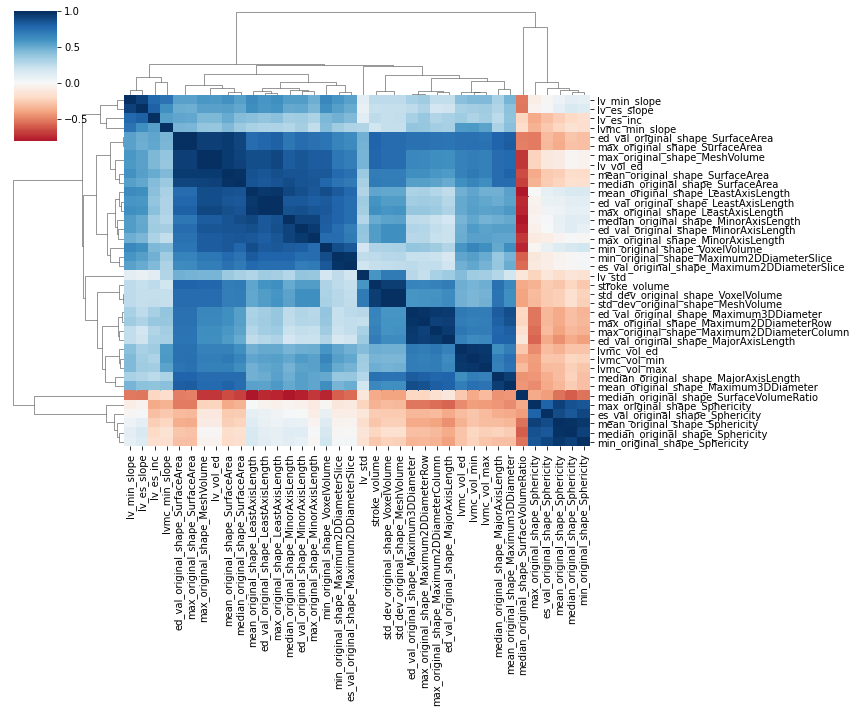

In [10]:
sns.clustermap(important_features_df[numerical_columns].corr(),cmap = 'RdBu', center = 0.0, figsize=(12,10));

In [11]:
# feature scaling
important_features_df_scaled = important_features_df.copy(deep=True)
important_features_df_scaled[numerical_columns] = scaler.fit_transform(important_features_df[numerical_columns])
important_features_df_scaled.head()

,patient_id,ed_val_original_shape_LeastAxisLength,ed_val_original_shape_Maximum3DDiameter,max_original_shape_Maximum2DDiameterColumn,min_original_shape_Maximum2DDiameterSlice,max_original_shape_Sphericity,median_original_shape_Sphericity,max_original_shape_Maximum2DDiameterRow,ed_val_original_shape_MinorAxisLength,median_original_shape_MajorAxisLength,...,lvmc_vol_ed,lvmc_vol_max,lv_std,lv_es_inc,lv_min_slope,lvmc_min_slope,lv_es_slope,pkvo2,dyspnea,petco2
0,101B,0.508305,0.219433,0.172777,0.597291,0.536290,0.100629,0.267402,0.354438,0.189823,...,0.426621,0.361373,0.423495,0.204305,0.260476,0.000000,0.321596,1.52,1.0,25.0
1,103,0.776956,0.555939,0.363060,0.789193,0.780270,0.746820,0.512784,0.910446,0.529388,...,0.580887,0.582149,0.521283,0.457741,1.000000,1.000000,0.994493,2.36,1.0,39.0
2,105B,0.961729,0.548746,0.544494,0.965813,0.706762,0.710401,0.600963,0.847084,0.665332,...,0.650232,0.585189,0.523248,0.477262,0.604874,0.362873,0.804160,2.53,1.0,30.0
3,109,0.501951,0.417086,0.405586,0.311683,0.616889,0.606247,0.453076,0.566651,0.376029,...,0.449233,0.356054,1.000000,0.197114,0.358599,0.375106,0.356624,1.23,1.0,27.0
4,113B,0.237427,0.391807,0.405586,0.069454,0.331640,0.078957,0.420437,0.256569,0.365036,...,0.352251,0.272455,0.538872,0.126399,0.200924,0.390877,0.199817,1.32,1.0,26.0


## Feature selection

Since the number of patients is 51, let's keep 4 uncorrelated features to avoid overfitting. Let's find all combinations of 4 features that have VIF scores of less than 5 for all features in the subset. Furthermore, median sphericity was the most distinguinguishing feature separating the high and low PkVO2 patients. So let's further reduce the number of possible combinations to the ones that only include median sphericity. 

In [12]:
num_feat = 4
interesting_combos = []
for comb in itertools.combinations(numerical_columns, num_feat):
    important_features_subset = list(comb)
    if 'median_original_shape_Sphericity' in important_features_subset and \
    'es_val_original_shape_Maximum2DDiameterSlice' in important_features_subset:
        vif_values = [vif(important_features_df_scaled[important_features_subset].values, i) for i in range(num_feat)]
        if max(vif_values) <= 5.:
            vif_feat_vals = {important_features_subset[ind]: vals for ind,vals in enumerate(vif_values)}
            interesting_combos.append(important_features_subset)
interesting_combos

[['ed_val_original_shape_Maximum3DDiameter',
  'median_original_shape_Sphericity',
  'es_val_original_shape_Maximum2DDiameterSlice',
  'median_original_shape_SurfaceVolumeRatio'],
 ['ed_val_original_shape_Maximum3DDiameter',
  'median_original_shape_Sphericity',
  'es_val_original_shape_Maximum2DDiameterSlice',
  'lv_std'],
 ['max_original_shape_Maximum2DDiameterColumn',
  'median_original_shape_Sphericity',
  'es_val_original_shape_Maximum2DDiameterSlice',
  'median_original_shape_SurfaceVolumeRatio'],
 ['max_original_shape_Maximum2DDiameterColumn',
  'median_original_shape_Sphericity',
  'es_val_original_shape_Maximum2DDiameterSlice',
  'lv_std'],
 ['median_original_shape_Sphericity',
  'max_original_shape_Maximum2DDiameterRow',
  'es_val_original_shape_Maximum2DDiameterSlice',
  'median_original_shape_SurfaceVolumeRatio'],
 ['median_original_shape_Sphericity',
  'max_original_shape_Maximum2DDiameterRow',
  'es_val_original_shape_Maximum2DDiameterSlice',
  'lv_std'],
 ['median_origin

In [13]:
if not os.path.isfile(os.getcwd()+'/interesting_combos.pkl'):
    with open('interesting_combos.pkl', 'wb') as f:
        pickle.dump(interesting_combos, f)

In [14]:
with open('interesting_combos.pkl', 'rb') as f:
    interesting_combos = pickle.load(f)

In [18]:
print('number of interesting combinations of features =', len(interesting_combos))

number of interesting combinations of features = 10


#### Best feature combination

Let's find out which combination gives us the best ROC AUC score after grid search. Here we use the stratified 5-fold cross-validation technique with nested grid search since it reduces overfitting. Let's do 10 trials for each combination of features and grid search parameters. 

In [20]:
roc_auc_scores = []
t1 = time.time()
rf_class = RandomForestClassifier()
for f, features_subset in enumerate(interesting_combos):

    X = important_features_df_scaled[features_subset]
    y = important_features_df['dyspnea']
    # Number of random trials
    NUM_TRIALS = 10

    # Set up possible values of parameters to optimize over
    p_grid = { 'max_depth': [7,9], 'n_estimators': [10,15], 'min_samples_leaf': [1,2]}

    # Arrays to store scores
    nested_scores = np.zeros(NUM_TRIALS)

    # Loop for each trial
    print(f'\nFeature Subset = {f+1}/{len(interesting_combos)}, Trial no. ')
    for i in range(NUM_TRIALS):

        # Using stratified k-fold to preserve the ratio between high and low PkVO2 patients in validation set
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
        outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

        # Nested CV with parameter optimization
        clf = GridSearchCV(estimator=rf_class, scoring='roc_auc', param_grid=p_grid, cv=inner_cv)
        nested_score = cross_val_score(clf, scoring='roc_auc', X=X, y=y, cv=outer_cv)
        nested_scores[i] = nested_score.mean()

        print(f'{i+1}/{NUM_TRIALS}',end=', ')
    print('\n','Mean ROC AUC score',round(nested_scores.mean(), 3), \
          'Std Dev ROC AUC score', round(nested_scores.std(), 2))
    roc_auc_scores.append((round(nested_scores.mean(), 3), round(nested_scores.std(), 2)))
    
t2 = time.time()
print('Time taken = ', int((t2-t1)/60),' minutes')


Feature Subset = 1/10, Trial no. 
1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 
 Mean ROC AUC score 0.51 Std Dev ROC AUC score 0.06

Feature Subset = 2/10, Trial no. 
1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 
 Mean ROC AUC score 0.644 Std Dev ROC AUC score 0.08

Feature Subset = 3/10, Trial no. 
1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 
 Mean ROC AUC score 0.577 Std Dev ROC AUC score 0.05

Feature Subset = 4/10, Trial no. 
1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 
 Mean ROC AUC score 0.665 Std Dev ROC AUC score 0.05

Feature Subset = 5/10, Trial no. 
1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 
 Mean ROC AUC score 0.542 Std Dev ROC AUC score 0.05

Feature Subset = 6/10, Trial no. 
1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 
 Mean ROC AUC score 0.595 Std Dev ROC AUC score 0.07

Feature Subset = 7/10, Trial no. 
1/10, 2/10, 3/10, 4/10, 5/10, 6/10, 7/10, 8/10, 9/10, 10/10, 
 Mea

In [22]:
roc_auc_scores

[(0.51, 0.06),
 (0.644, 0.08),
 (0.577, 0.05),
 (0.665, 0.05),
 (0.542, 0.05),
 (0.595, 0.07),
 (0.6, 0.04),
 (0.637, 0.1),
 (0.578, 0.06),
 (0.615, 0.07)]

In [23]:
#best feature
features_subset = interesting_combos[3]
features_subset

['max_original_shape_Maximum2DDiameterColumn',
 'median_original_shape_Sphericity',
 'es_val_original_shape_Maximum2DDiameterSlice',
 'lv_std']

Now let's run 20 trials on the selected combination and do a grid search. For each cross validation set, let's save the parameters of the random forest that did the best.

In [24]:
n_splits = 5
best_model_list = []
X = important_features_df_scaled[features_subset]
y = important_features_df['dyspnea']
NUM_TRIALS = 20
outer_results = np.zeros((NUM_TRIALS, n_splits))

for i in range(NUM_TRIALS):
    outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i)
    j = 0
    best_model_list_per_trial = []
    for train_ix, test_ix in outer_cv.split(X, y):
        # split data
        X_train, X_test = X.loc[train_ix, :], X.loc[test_ix, :]
        y_train, y_test = y[train_ix].values, y[test_ix].values
        # configure the cross-validation procedure
        inner_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i)
        # define search
        rf_class = RandomForestClassifier()
        search = GridSearchCV(rf_class, scoring='roc_auc', param_grid=p_grid, cv=inner_cv)
        # execute search
        result = search.fit(X_train, y_train)
        # get the best performing model fit on the whole training set
        best_model = result.best_estimator_
        best_model_list_per_trial.append(best_model)
        # Train the model on the inner fold and evaluate model on the outer fold validation dataset
        best_model.fit(X_train, y_train)
        yhat = best_model.predict(X_test)
        # evaluate the model
        roc_auc = roc_auc_score(y_test, yhat)
        # store the result
        outer_results[i,j] = roc_auc
        j += 1
    best_model_list.append(best_model_list_per_trial)
    print(i,end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 

In [25]:
best_model_scores = {}
for n_trial in range(NUM_TRIALS):
    for fold in range(n_splits):
        model = best_model_list[n_trial][fold]
        max_depth = model.get_params()['max_depth']
        n_estimators = model.get_params()['n_estimators']    
        min_samples_leaf = model.get_params()['min_samples_leaf'] 
        attr = f'max_depth_{max_depth}_n_estimators_{n_estimators}_min_samples_leaf_{min_samples_leaf}'
        if attr in best_model_scores.keys():
            best_model_scores[attr].append(outer_results[n_trial, fold])
        else:
            best_model_scores[attr] = [outer_results[n_trial, fold]]

In [26]:
model_stats = []
for key, scores in best_model_scores.items():
    model_stats.append((key,round(np.mean(scores),3),round(np.std(scores),3),len(scores))) 

In [27]:
print('Model parameters ranked by ROC AUC scores\n(model, roc auc mean, roc auc std dev, n times)')
[print(model) for model in sorted(model_stats, key=lambda x:x[1],reverse=True)];

Model parameters ranked by ROC AUC scores
(model, roc auc mean, roc auc std dev, n times)
('max_depth_9_n_estimators_10_min_samples_leaf_2', 0.637, 0.201, 10)
('max_depth_7_n_estimators_10_min_samples_leaf_1', 0.624, 0.134, 12)
('max_depth_9_n_estimators_15_min_samples_leaf_2', 0.622, 0.104, 11)
('max_depth_7_n_estimators_15_min_samples_leaf_1', 0.617, 0.092, 14)
('max_depth_7_n_estimators_10_min_samples_leaf_2', 0.617, 0.104, 15)
('max_depth_9_n_estimators_15_min_samples_leaf_1', 0.612, 0.144, 13)
('max_depth_7_n_estimators_15_min_samples_leaf_2', 0.6, 0.153, 15)
('max_depth_9_n_estimators_10_min_samples_leaf_1', 0.548, 0.164, 10)


In [37]:
best_model_attr = sorted(model_stats, key=lambda x:x[1],reverse=True)[1][0]
match = re.search(r'(max_depth_)([\d]+)(_n_estimators_)([\d]+)(_min_samples_leaf_)([\d]+)',best_model_attr)
print('Attributes of best model:', best_model_attr)

Attributes of best model: max_depth_7_n_estimators_10_min_samples_leaf_1


For final optimum model, let's do a 100 iterations of 5 fold cross validation. For each iteration, let's save the predictions on the validation set.  

In [106]:
X = important_features_df_scaled[features_subset]
y = important_features_df['dyspnea']
# Number of random trials
NUM_TRIALS = 20

match = re.search(r'(max_depth_)([\d]+)(_n_estimators_)([\d]+)(_min_samples_leaf_)([\d]+)',best_model_attr)
match.group(2)

rf_class = RandomForestClassifier(max_depth = int(match.group(2)), n_estimators = int(match.group(4)),\
                                 min_samples_leaf = int(match.group(6)))
print(rf_class)

# Arrays to store scores
scores = np.zeros(NUM_TRIALS)
val_preds = []

for i in range(NUM_TRIALS):
    val_preds_per_trial = []
    scores_per_trial = []

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    for train_ix, test_ix in cv.split(X,y):
        X_train, X_test = X.loc[train_ix, :], X.loc[test_ix, :]
        y_train, y_test = y[train_ix].values, y[test_ix].values
        rf_class.fit(X_train, y_train)
        y_hat = rf_class.predict(X_test)
        val_preds_per_trial.append([important_features_df_scaled.loc[test_ix]['patient_id'].values, y_test, y_hat])
        scores_per_trial.append(roc_auc_score(y_test, y_hat))
    scores[i] = np.mean(scores_per_trial)    
    val_preds.append(val_preds_per_trial)    
    print(i,end=', ')
print('\n',round(scores.mean(), 3), round(scores.std(), 2))

RandomForestClassifier(max_depth=7, n_estimators=10)
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
 0.598 0.06


Now, let's examine which of the cases are repeatedly being mis-classified.

In [103]:
def collect_correct_incorrect(val_preds):
    ground_truth = {}
    predictions = {}
    for n_trial in range(NUM_TRIALS):
        for n_split in range(n_splits):
            pids = val_preds[n_trial][n_split][0]
            for ind, pid in enumerate(pids):
                if pid in predictions.keys():
                    predictions[pid].append(val_preds[n_trial][n_split][2][ind])
                else:
                    ground_truth[pid] = val_preds[n_trial][n_split][1][ind]          
                    predictions[pid] = [val_preds[n_trial][n_split][2][ind]]
    return ground_truth, predictions

In [104]:
def count_correct_incorrect(ground_truth, predictions):
    correct = {}
    incorrect = {}
    for pid in predictions.keys():
        correct[pid] = 0
        incorrect[pid] = 0
        for pred in predictions[pid]:
            if pred == ground_truth[pid]:
                correct[pid] += 1
            else:
                incorrect[pid] += 1
    return correct, incorrect

In [107]:
ground_truth, predictions = collect_correct_incorrect(val_preds)
correct, incorrect = count_correct_incorrect(ground_truth, predictions)
correct_sorted = {key: value for key, value in sorted(correct.items(), key = lambda x: x[1], reverse = False)}

In [47]:
def barplot_func(num_patients_start=0, num_patients_end=len(ground_truth)+1):
    x = list(correct_sorted.keys())[num_patients_start: num_patients_end]
    y1 = [correct_sorted[pid] for pid in x]
    y2 = [incorrect[pid] for pid in x]
    plt.figure(figsize=(15,5))
    plt.bar(x,y1,label='correct',width=0.4)
    plt.bar(x,y2,label='incorrect',align='edge',width=0.4)
    plt.legend();

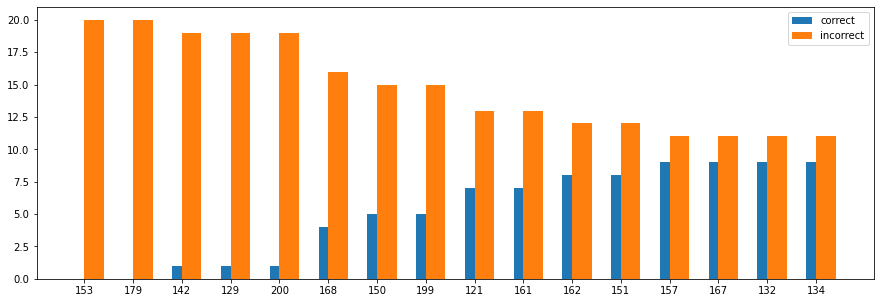

In [108]:
barplot_func(0,16)

Patient Ids 153, 179, 142, 129, 200, 168 have a very high mis-classification rate.  

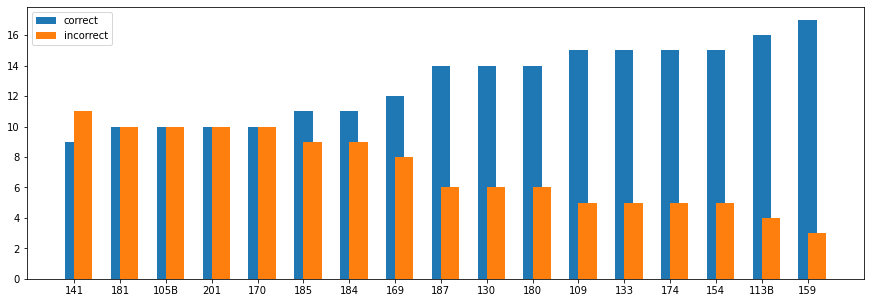

In [109]:
barplot_func(16,33)

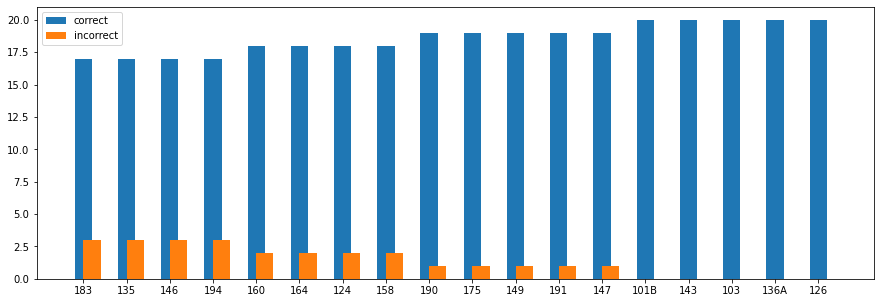

In [110]:
barplot_func(33,)

Let's examine the bad cases closely.

In [113]:
bad_cases = [key for key, value in correct_sorted.items()][0:6]
bad_cases

['153', '179', '142', '129', '200', '168']

In [114]:
bad_cases_df = important_features_df_scaled[important_features_df_scaled['patient_id'].isin(bad_cases)]
bad_cases_df.head()

,patient_id,ed_val_original_shape_LeastAxisLength,ed_val_original_shape_Maximum3DDiameter,max_original_shape_Maximum2DDiameterColumn,min_original_shape_Maximum2DDiameterSlice,max_original_shape_Sphericity,median_original_shape_Sphericity,max_original_shape_Maximum2DDiameterRow,ed_val_original_shape_MinorAxisLength,median_original_shape_MajorAxisLength,...,lvmc_vol_ed,lvmc_vol_max,lv_std,lv_es_inc,lv_min_slope,lvmc_min_slope,lv_es_slope,pkvo2,dyspnea,petco2
8,129,0.478765,0.465076,0.458892,0.623438,0.793305,0.794069,0.531496,0.657680,0.447213,...,0.834649,0.702987,0.375628,0.349141,0.615732,0.478757,0.612341,2.49,0.0,26.0
16,142,0.555800,0.260756,0.236139,0.342035,0.940275,0.665639,0.312957,0.461157,0.229338,...,0.280394,0.185057,0.383175,0.249909,0.436926,0.120910,0.451510,0.95,1.0,26.0
23,153,0.247744,0.213644,0.154003,0.154301,0.816908,0.724128,0.242065,0.211230,0.272222,...,0.141202,0.076759,0.281462,0.166735,0.287839,0.238346,0.286254,1.14,1.0,22.0
33,168,0.000000,0.000000,0.000000,0.000000,0.749365,0.511112,0.000000,0.310847,0.175478,...,0.000000,0.000000,0.382025,0.000000,0.000000,0.020575,0.000000,1.08,1.0,19.0
38,179,1.000000,0.550951,0.499707,0.965813,0.499545,0.526704,0.553683,1.000000,0.550500,...,0.601490,0.475371,0.712592,0.455618,0.690884,0.453090,0.715414,3.22,0.0,25.0


In [81]:
path = os.getcwd()
cpet_file = path + '/ExerciseMRIEvaluatio_DATA_LABELS_2021-03-16_1304.xlsx'
cpet_data = pd.read_excel(cpet_file)
cpet_data.dropna(subset=['VO2 (MAX):'],inplace=True)
cpet_data.dropna(subset=['VO2 %Predicted '],inplace=True)
cpet_data.shape

(67, 662)

In [115]:
num_rows = bad_cases_df.shape[0]
for n in range(num_rows):
    condition = bad_cases_df.iloc[n]['dyspnea']
    pid = bad_cases_df.iloc[n]['patient_id']
    num_pid = int(pid[0:3])
    cpet_record = cpet_data[cpet_data['Record ID'].values == num_pid]
    print('Patient Id = ', pid, ' , Condition = ', condition, ' , VO2 %Predicted = ', \
          cpet_record['VO2 %Predicted '].values[0])

Patient Id =  129  , Condition =  0.0  , VO2 %Predicted =  91.2
Patient Id =  142  , Condition =  1.0  , VO2 %Predicted =  48.0
Patient Id =  153  , Condition =  1.0  , VO2 %Predicted =  79.7
Patient Id =  168  , Condition =  1.0  , VO2 %Predicted =  74.5
Patient Id =  179  , Condition =  0.0  , VO2 %Predicted =  122.0
Patient Id =  200  , Condition =  0.0  , VO2 %Predicted =  82.2


__Observation__: Patient Id 153 has a VO2 %Predicted value of 79.7 which is marginally close to the cut-off value of 80% above which patients are considered as having high PkVO2. We can flip the class of this patient and see if the ROC AUC scores improve.

Let's check if any features of these bad cases have extreme values.

In [116]:
bad_features = {case:[] for case in bad_cases}
for case in bad_cases:
    for col in numerical_columns:
        if bad_cases_df[bad_cases_df['patient_id'] == case][col].values[0] > 0.99 or \
        bad_cases_df[bad_cases_df['patient_id'] == case][col].values[0] < 0.01:
            bad_features[case].append(col)
    

In [117]:
bad_features

{'153': [],
 '179': ['ed_val_original_shape_LeastAxisLength',
  'ed_val_original_shape_MinorAxisLength',
  'mean_original_shape_LeastAxisLength',
  'median_original_shape_MinorAxisLength',
  'max_original_shape_MinorAxisLength',
  'max_original_shape_LeastAxisLength'],
 '142': [],
 '129': [],
 '200': ['median_original_shape_MajorAxisLength',
  'mean_original_shape_SurfaceArea',
  'max_original_shape_MeshVolume',
  'ed_val_original_shape_SurfaceArea',
  'std_dev_original_shape_VoxelVolume',
  'median_original_shape_SurfaceArea',
  'max_original_shape_SurfaceArea',
  'std_dev_original_shape_MeshVolume',
  'stroke_volume',
  'lv_vol_ed'],
 '168': ['ed_val_original_shape_LeastAxisLength',
  'ed_val_original_shape_Maximum3DDiameter',
  'max_original_shape_Maximum2DDiameterColumn',
  'min_original_shape_Maximum2DDiameterSlice',
  'max_original_shape_Maximum2DDiameterRow',
  'mean_original_shape_SurfaceArea',
  'ed_val_original_shape_SurfaceArea',
  'mean_original_shape_LeastAxisLength',
  'm

Patient Ids 179, 200 and 168 have features with extreme values. We went back to the segmented images and they look fine. 

In [118]:
# Flipping the class label of patient 153
important_features_df.loc[23,'dyspnea'] = 0
important_features_df[important_features_df['patient_id']=='153']

,patient_id,ed_val_original_shape_LeastAxisLength,ed_val_original_shape_Maximum3DDiameter,max_original_shape_Maximum2DDiameterColumn,min_original_shape_Maximum2DDiameterSlice,max_original_shape_Sphericity,median_original_shape_Sphericity,max_original_shape_Maximum2DDiameterRow,ed_val_original_shape_MinorAxisLength,median_original_shape_MajorAxisLength,...,lvmc_vol_ed,lvmc_vol_max,lv_std,lv_es_inc,lv_min_slope,lvmc_min_slope,lv_es_slope,pkvo2,dyspnea,petco2
23,153,42.272488,93.411054,89.494501,38.295724,0.779251,0.748158,92.195445,46.789588,79.810201,...,85015.5,85489.3125,7965.467931,6.064861,1.963456,2.224151,1.963456,1.14,0.0,22.0


Let's use the same hyperparameters for the model and run cross-validation. 

In [119]:
X = important_features_df_scaled[features_subset]
y = important_features_df['dyspnea']
# Number of random trials
NUM_TRIALS = 20

match = re.search(r'(max_depth_)([\d]+)(_n_estimators_)([\d]+)(_min_samples_leaf_)([\d]+)',best_model_attr)
match.group(2)

rf_class = RandomForestClassifier(max_depth = int(match.group(2)), n_estimators = int(match.group(4)),\
                                 min_samples_leaf = int(match.group(6)))
print(rf_class)

# Arrays to store scores
scores = np.zeros(NUM_TRIALS)
val_preds = []

for i in range(NUM_TRIALS):
    val_preds_per_trial = []
    scores_per_trial = []

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)

    for train_ix, test_ix in cv.split(X,y):
        X_train, X_test = X.loc[train_ix, :], X.loc[test_ix, :]
        y_train, y_test = y[train_ix].values, y[test_ix].values
        rf_class.fit(X_train, y_train)
        y_hat = rf_class.predict(X_test)
        val_preds_per_trial.append([important_features_df_scaled.loc[test_ix]['patient_id'].values, y_test, y_hat])
        scores_per_trial.append(roc_auc_score(y_test, y_hat))
    scores[i] = np.mean(scores_per_trial)    
    val_preds.append(val_preds_per_trial)    
    print(i,end=', ')
print('\n',round(scores.mean(), 3), round(scores.std(), 2))

RandomForestClassifier(max_depth=7, n_estimators=10)
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
 0.652 0.04


__Observation:__ We see an improvement in cross-validation ROC AUC score from 0.60 <ins>+</ins> 0.06 to 0.65 <ins>+</ins> 0.06.

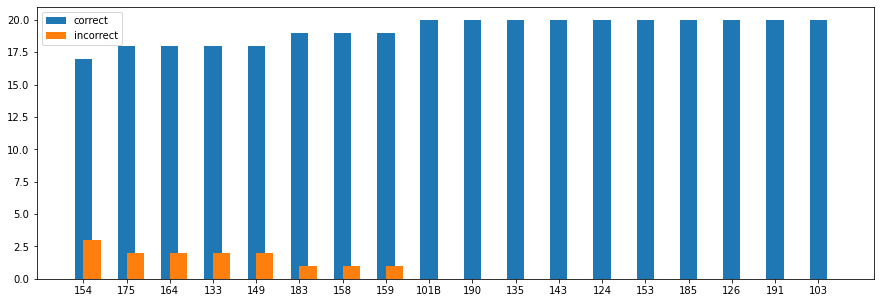

In [120]:
# Looking at classification rate of patient 153 
ground_truth, predictions = collect_correct_incorrect(val_preds)
correct, incorrect = count_correct_incorrect(ground_truth, predictions)
correct_sorted = {key: value for key, value in sorted(correct.items(), key = lambda x: x[1], reverse = False)}
barplot_func(33,)

__Observation:__ We see that Patient 153 is now always predicted correctly! 

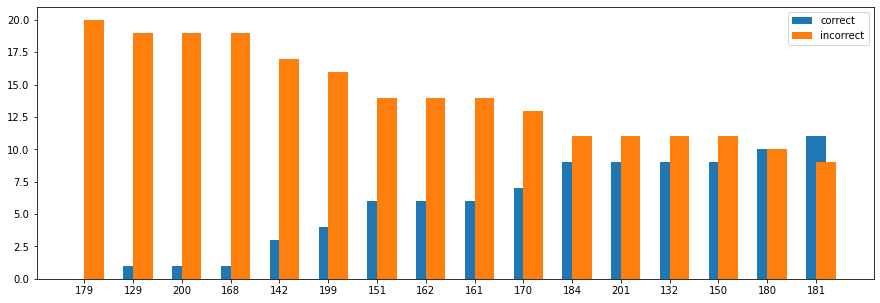

In [123]:
barplot_func(0,16)

Patients '179', '142', '129', '200' and '168' are still mis-classified!